In [28]:
import pandas as pd
from pathlib import Path

# allow imports from the parent directory
import sys
sys.path.append("..")

from src.data.promptloader import (
    PromptLoader,
    GigawordDataLoader,
    DailymailDataLoader,
    TweetQADataLoader,
    RottenTomatoesDataLoader,
    MMLUAbstractAlgebraDataLoader,
    GSM8KDataLoader,
    MMLUHumanAgingDataLoader,
)

from src.tools.plot import set_theme, dataset_color, dataset_label, model_label, plot_df_metrics_per_model
from src.tools.pandas_helpers import get_converse_results

set_theme()

In [17]:
rt_results_df = get_converse_results("rotten_tomatoes", RottenTomatoesDataLoader, ["iterative/random_conversation"])
aa_results_df = get_converse_results("mmluaa", MMLUAbstractAlgebraDataLoader, ["iterative/random_conversation"])

# concatenate the two dataframes
results_df = pd.concat([rt_results_df, aa_results_df])
results_df.head()

14
14


,model,incontext_set,num_examples,matches,failed,total,acc,acc_pct_change
0,mistral-7b,rotten_tomatoes,0,922,1,1066,0.864916,0.000000
1,mistral-7b,rotten_tomatoes,1,912,0,1066,0.855535,-1.084599
2,mistral-7b,rotten_tomatoes,2,911,0,1066,0.854597,-1.193059
3,mistral-7b,rotten_tomatoes,3,912,0,1066,0.855535,-1.084599
4,mistral-7b,rotten_tomatoes,4,912,0,1066,0.855535,-1.084599


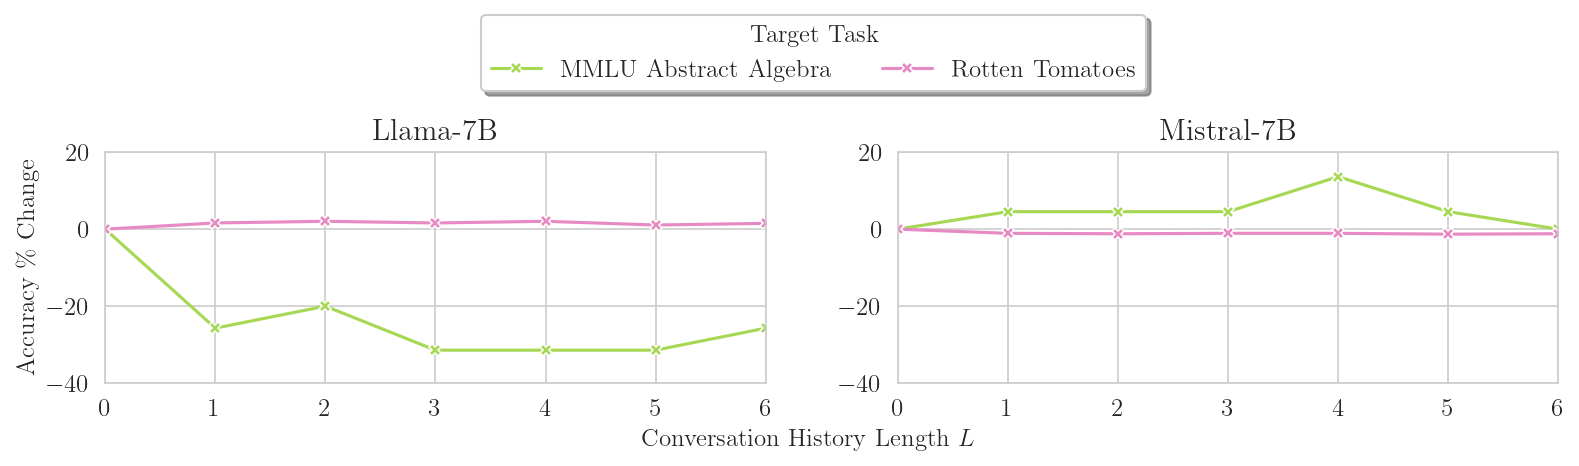

In [29]:
label = r"Accuracy \% Change"
df = results_df.rename(columns={"acc_pct_change": label})
plot_df_metrics_per_model(
  df, 
  [label], 
  # title="MMLU Abstract Algebra Results",
  legend_anchor=(0.55, 1.65),
  adjust_func=lambda axs: axs[0, 0].set_ylim(-40, 20),
  # legend_axs=(1, 1),
  legend_title="Target Task",
  legend_rows=1,
  save_path=Path("random_history/random_history.pdf"), 
  # save_png=True,
)